## Introduction to SQLite and Python
For more sample code see http://www.sqlitetutorial.net/sqlite-python/

In [1]:
import sqlite3

In [2]:
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
# create a database connection
conn = create_connection("/Users/ajitajohn/694/data/students2023.db")

In [4]:
# create a cursor object instance which allows sql queries to be executed
cur = conn.cursor()

In [5]:
# create a table in the database
cur.execute( (
    "CREATE TABLE students"
    "( name TEXT PRIMARY KEY, gpa REAL CHECK (gpa >= 0.0 and gpa <= 4.0), "
    "age INTEGER,dept TEXT, gender CHAR)"
))

In [6]:
# function for executing a query and printing results
def execute_query_and_print(cur, query):
    """
    Executes a query and prints results
    :param cur: the Cursor object
    :param query: the sql query to be executed
    :return:
    """
    cur.execute(query)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


In [7]:
cur.execute((
    "INSERT INTO students VALUES"
    "('Sergey Brin', 2.8, 40, 'CS', 'M')," 
    "('Danah Boyd', 3.9, 35, 'CS', 'F'),"
    "('Bill Gates', 1.0, 60, 'CS', 'M'),"
    "('Hillary Mason', 4.0, 35, 'DATASCI', 'F'),"
    "('Mike Olson', 3.7, 50, 'CS', 'M'),"
    "('Mark Zuckerberg', 4.0, 30, 'CS', 'M'),"
    "('Sheryl Sandberg', 4.0, 47, 'BUSINESS', 'F'),"
    "('Susan Wojcicki', 4.0, 46, 'BUSINESS', 'F'),"
    "('Marissa Meyer', 4.0, 45, 'BUSINESS', 'F')"
))
conn.commit()

In [8]:
print("printing students")
execute_query_and_print(cur,"SELECT * FROM students")

printing students
('Sergey Brin', 2.8, 40, 'CS', 'M')
('Danah Boyd', 3.9, 35, 'CS', 'F')
('Bill Gates', 1.0, 60, 'CS', 'M')
('Hillary Mason', 4.0, 35, 'DATASCI', 'F')
('Mike Olson', 3.7, 50, 'CS', 'M')
('Mark Zuckerberg', 4.0, 30, 'CS', 'M')
('Sheryl Sandberg', 4.0, 47, 'BUSINESS', 'F')
('Susan Wojcicki', 4.0, 46, 'BUSINESS', 'F')
('Marissa Meyer', 4.0, 45, 'BUSINESS', 'F')


In [9]:
execute_query_and_print(cur,"SELECT name,gpa FROM students where dept='CS'")

('Sergey Brin', 2.8)
('Danah Boyd', 3.9)
('Bill Gates', 1.0)
('Mike Olson', 3.7)
('Mark Zuckerberg', 4.0)


In [10]:
# insert a record with NULL in gpa field
execute_query_and_print(cur,"INSERT INTO students VALUES ('Jack Sparrow', NULL, 35, 'CS', 'M')")

In [11]:
# Jack Sparrow is not returned
execute_query_and_print(cur,"SELECT * FROM students WHERE gpa < 2.5")

('Bill Gates', 1.0, 60, 'CS', 'M')


In [12]:
# get results with NULL (stored as None in Python) in gpa
execute_query_and_print(cur,"SELECT * FROM students WHERE gpa < 2.5 OR gpa IS NULL")

('Bill Gates', 1.0, 60, 'CS', 'M')
('Jack Sparrow', None, 35, 'CS', 'M')


In [13]:
cur.close()
conn.close()

#### Download the European soccer database from https://www.kaggle.com/hugomathien/soccer and save it in a directory. In the code below it has been saved one level up from this Jupyter notebook. If you save it somewhere else, be sure to give the absolute path or relative path from this directory. 



In [14]:
connection = sqlite3.connect('../data/database2.sqlite')
cursor = connection.cursor()

In [15]:
# find tables in data
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [16]:
#print the results of query
rows = cursor.fetchall()
print(rows)

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [17]:
# do the executing and printing in one step
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('sqlite_sequence',)
('Player_Attributes',)
('Player',)
('Match',)
('League',)
('Country',)
('Team',)
('Team_Attributes',)


In [21]:
%%timeit -n 1 -r 1
cursor.execute("SELECT * FROM Country")
rows = cursor.fetchall()
print(rows)

[(1, 'Belgium'), (1729, 'England'), (4769, 'France'), (7809, 'Germany'), (10257, 'Italy'), (13274, 'Netherlands'), (15722, 'Poland'), (17642, 'Portugal'), (19694, 'Scotland'), (21518, 'Spain'), (24558, 'Switzerland')]
801 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
#find column names from result
colnames = cursor.description
for row in colnames:
    print(row[0])

id
name


In [23]:
# define a function to get column names
def column_names(table_name):
    cursor.execute("SELECT * FROM "+table_name)
    colnames = cursor.description
    for row in colnames:
        print(row[0])

In [24]:
column_names('Country')

id
name


In [25]:
column_names('Player')

id
player_api_id
player_name
player_fifa_api_id
birthday
height
weight


In [2]:
# Let's get the results of the queries into a Pandas dataframe and visualize it.
# These are some libraries that will help.
# For this course, you are only required to know simple use cases for dataframes and plotting
# if you get an error importing seaborn (or any other library) do "pip install seaborn" 
# on the command line
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
player_table = pd.read_sql_query("SELECT * FROM Player", connection)

In [28]:
player_table.shape

(11060, 7)

In [29]:
player_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [30]:
# first few rows in dataframe
player_table.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [31]:
player_table.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [32]:
player_table[10:15]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
10,11,23889,Aaron Mokoena,47189,1980-11-25 00:00:00,182.88,181
11,12,231592,Aaron Mooy,194958,1990-09-15 00:00:00,175.26,150
12,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168
13,14,40719,Aaron Niguez,183853,1989-04-26 00:00:00,170.18,143
14,15,75489,Aaron Ramsey,186561,1990-12-26 00:00:00,177.80,154


In [33]:
tall_players = pd.read_sql_query("SELECT * FROM Player WHERE height>180", connection)

In [34]:
tall_players.shape

(7258, 7)

In [35]:
tall_players[10:15]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
10,105,277313,Adam Gyurcso,209439,1991-03-06 00:00:00,180.34,132
11,110,414208,Adam King,212388,1995-10-11 00:00:00,180.34,165
12,119,185336,Adam Matuschyk,192471,1989-02-14 00:00:00,180.34,165
13,129,160447,Adam Smith,190885,1991-04-29 00:00:00,180.34,179
14,132,71359,Adam Vass,170046,1988-09-09 00:00:00,180.34,165


(110.0, 200.0)

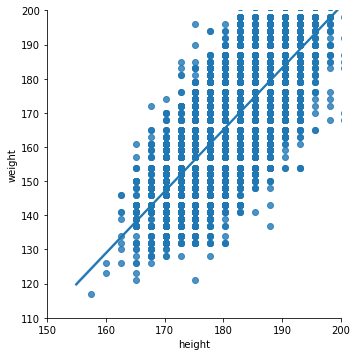

In [36]:
sns.lmplot(x="height", y="weight", data=player_table)
plt.xlim(150, 200)
plt.ylim(110, 200)

In [3]:
# to get help on a function, use ? after it
sns.lmplot?

In [37]:
column_names('League')

id
country_id
name


In [38]:
column_names('Team')

id
team_api_id
team_fifa_api_id
team_long_name
team_short_name


In [44]:
column_names('Match')

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [42]:
%%timeit -n 1 -r 1
games_table1 = pd.read_sql_query("SELECT country_id, count(*) as games \
                                 FROM Match GROUP BY country_id", connection)

35.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
games_table1

,country_id,games
0,1,1728
1,1729,3040
2,4769,3040
3,7809,2448
4,10257,3017
5,13274,2448
6,15722,1920
7,17642,2052
8,19694,1824
9,21518,3040


In [45]:
# get name of Country instead of id
games_table = pd.read_sql_query("SELECT name, games \
                                FROM Country INNER JOIN  \
                                (SELECT country_id, count(*) AS games \
                                    FROM Match GROUP BY country_id) C  \
                                ON C.country_id=Country.id", connection)

In [46]:
games_table

,name,games
0,Belgium,1728
1,England,3040
2,France,3040
3,Germany,2448
4,Italy,3017
5,Netherlands,2448
6,Poland,1920
7,Portugal,2052
8,Scotland,1824
9,Spain,3040


<AxesSubplot:xlabel='name', ylabel='games'>

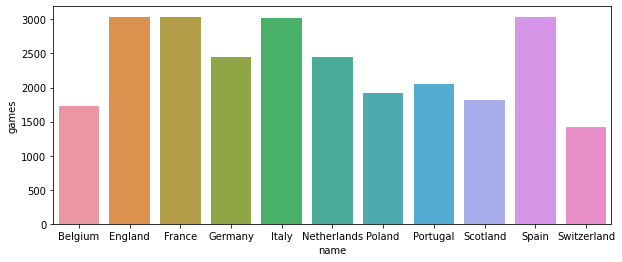

In [47]:
plt.figure(figsize=(10,4))
sns.barplot(x="name", y="games", data=games_table)

In [44]:
sns.barplot?

In [48]:
player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", connection)

In [49]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [50]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [51]:
# to value counts to find how many right and left footed players
player_attributes['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [52]:
# get some stats
player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [53]:
highly_rated = pd.read_sql_query("SELECT *  FROM Player_Attributes \
                                    WHERE overall_rating > 90", connection)

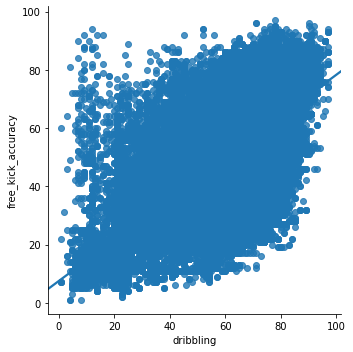

In [54]:
# this may take a while to plot
sns.lmplot(y="free_kick_accuracy", x="dribbling", scatter=True, data=player_attributes)

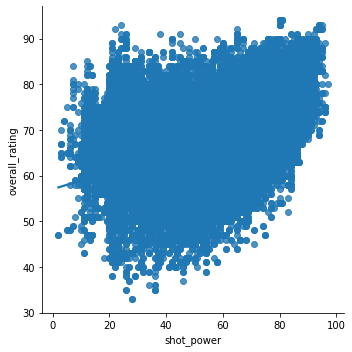

In [53]:
sns.lmplot(y="overall_rating", x="shot_power", scatter=True, data=player_attributes)

In [55]:
foot_attributes = pd.read_sql_query("SELECT count(*), preferred_foot, max(overall_rating), "+
                                    "max(potential), min(overall_rating), min(potential) "+
                                    "FROM Player_Attributes GROUP BY preferred_foot", connection)

In [56]:
foot_attributes

,count(*),preferred_foot,max(overall_rating),max(potential),min(overall_rating),min(potential)
0,836,None,NaN,NaN,NaN,NaN
1,44733,left,94.0,97.0,35.0,45.0
2,138409,right,93.0,95.0,33.0,39.0


In [57]:
cursor.close()
connection.close()